In [71]:
import pandas as pd
import seaborn as sns
import numpy as np
import csv
from collections import Counter

In [72]:
from tueplots import figsizes, fontsizes
# fontsizes.cvpr2024()  # Display font sizes
plt.rcParams.update(fontsizes.cvpr2024())  # Apply cvpr font sizes globally

In [ ]:
results = pd.read_csv('2025-02-02_results_DECODED.csv')
results.head(4)

building                 animal                  tree  \
                    Shape Texture Overall  Shape Texture Overall Shape   
TripoSR                 0       0       0      4      11      15     1   
IM                      8       5      13      1       2       3     1   
Gen3Diffusion           2       0       2      9       3      12     1   
TriplaneGaussian        0       0       0      6       4      10     4   
LGM                    10      15      25      0       0       0    13   

                                 Statue of Liberty  ... rocking horse figure  \
                 Texture Overall             Shape  ...       Overall  Shape   
TripoSR                3       4                 1  ...             7      5   
IM                     4       5                 1  ...            18      6   
Gen3Diffusion          0       1                11  ...            15      0   
TriplaneGaussian       7      11                 4  ...             0      8   
LGM                    6      19                 3  ...             0      1   

                                 soccer ball                 Overall          \
                 Texture Overall       Shape Texture Overall   Shape Texture   
TripoSR                7      12           5       6      11     332     317   
IM                     8      14          14      12      26     254     245   
Gen3Diffusion          0       0           1       2       3     103     123   
TriplaneGaussian       5      13           0       0       0      88      95   
LGM                    0       1           0       0       0      83      80   

                          
                 Overall  
TripoSR              649  
IM                   499  
Gen3Diffusion        226  
TriplaneGaussian     183  
LGM                  163  

[5 rows x 132 columns]

In [74]:
results_ = pd.read_csv('2025-02-02_results_DECODED_adjusted.csv')

def extract_object_name(col):
    if '[Shape]' not in col:
        return None
    if 'of this' in col:
        obj = col.split('of this')[1].split('[')[0]
    elif 'of these' in col:
        obj = col.split('of these')[1].split('[')[0]
    else:
        obj = col.split('of the')[1].split('[')[0]

    return obj.strip(' .')

# Get unique objects and all model names
cols = results_.columns
objects = [extract_object_name(col) for col in cols if col is not None and '[Shape]' in col]
objects = list(filter(None, objects))

# Get all unique model names across all questions
all_models = pd.Index([])
for col in cols:
    if '[Shape]' in col or '[Texture]' in col:
        all_models = all_models.union(results_[col].unique())

# Initialize counts with complete index
counts_dict = {}
for obj in objects:
    shape_col = next(col for col in cols if obj in col and '[Shape]' in col)
    texture_col = next(col for col in cols if obj in col and '[Texture]' in col)
    
    # Get counts with consistent index
    shape_counts = results_[shape_col].value_counts().reindex(all_models).fillna(0)
    texture_counts = results_[texture_col].value_counts().reindex(all_models).fillna(0)
    
    # Store metrics
    counts_dict[(obj, 'Shape')] = shape_counts
    counts_dict[(obj, 'Texture')] = texture_counts
    counts_dict[(obj, 'Overall')] = shape_counts + texture_counts

# Create DataFrame and finalize
model_df = pd.DataFrame(counts_dict)
model_df = model_df.fillna(0).astype(int)

# Add overall metrics
model_df['Overall', 'Shape'] = model_df[[col for col in model_df.columns if 'Shape' in col[1]]].sum(axis=1)
model_df['Overall', 'Texture'] = model_df[[col for col in model_df.columns if 'Texture' in col[1]]].sum(axis=1)
model_df['Overall', 'Overall'] = model_df[[col for col in model_df.columns if 'Overall' in col[1]]].sum(axis=1)

model_df = model_df.sort_values(('Overall', 'Overall'), ascending=False)

model_df

building                 animal                  tree  \
                    Shape Texture Overall  Shape Texture Overall Shape   
TripoSR                 0       0       0      4      11      15     1   
IM                      8       5      13      1       2       3     1   
Gen3Diffusion           2       0       2      9       3      12     1   
TriplaneGaussian        0       0       0      6       4      10     4   
LGM                    10      15      25      0       0       0    13   

                                 Statue of Liberty  ... rocking horse figure  \
                 Texture Overall             Shape  ...       Overall  Shape   
TripoSR                3       4                 1  ...             7      5   
IM                     4       5                 1  ...            18      6   
Gen3Diffusion          0       1                11  ...            15      0   
TriplaneGaussian       7      11                 4  ...             0      8   
LGM                    6      19                 3  ...             0      1   

                                 soccer ball                 Overall          \
                 Texture Overall       Shape Texture Overall   Shape Texture   
TripoSR                7      12           5       6      11     332     317   
IM                     8      14          14      12      26     254     245   
Gen3Diffusion          0       0           1       2       3     103     123   
TriplaneGaussian       5      13           0       0       0      88      95   
LGM                    0       1           0       0       0      83      80   

                          
                 Overall  
TripoSR              649  
IM                   499  
Gen3Diffusion        226  
TriplaneGaussian     183  
LGM                  163  

[5 rows x 132 columns]

In [75]:
# Get shape and texture columns
shape_cols = [col for col in cols if '[Shape]' in col]
texture_cols = [col for col in cols if '[Texture]' in col]

# Initialize empty DataFrames for each category
subject_responses = {}

# Process texture questions
texture_responses = pd.DataFrame()
for model in all_models:
    texture_responses[model] = results_[texture_cols].apply(lambda row: (row == model).sum(), axis=1)

# Process shape questions
shape_responses = pd.DataFrame()
for model in all_models:
    shape_responses[model] = results_[shape_cols].apply(lambda row: (row == model).sum(), axis=1)

# Combine into multi-index DataFrame
response_df = pd.concat({
    'Texture': texture_responses,
    'Shape': shape_responses,
    'Overall': texture_responses + shape_responses
}, axis=1)

# Sort by total responses
response_df = response_df.sort_values(('Overall', all_models[0]), ascending=False)
"""
# Display results
print("\nNumber of responses per model for each subject:")
response_df
"""

'\n# Display results\nprint("\nNumber of responses per model for each subject:")\nresponse_df\n'

In [76]:
print(response_df.head(5))

         Texture                                          Shape          \
   Gen3Diffusion  IM LGM TriplaneGaussian TripoSR Gen3Diffusion  IM LGM   
15            13   8   7                8       7             6  13   8   
11             8  11   8                8       8             8  11   8   
9              9   5   2                6      21             6  10   2   
0              7  10   1                7      18             6  12   1   
17             7   7   9                6      14             6   9   6   

                                  Overall                                   
   TriplaneGaussian TripoSR Gen3Diffusion  IM LGM TriplaneGaussian TripoSR  
15                3      13            19  21  15               11      20  
11                8       8            16  22  16               16      16  
9                 4      21            15  15   4               10      42  
0                 5      19            13  22   2               12      37  
17          

Percentage of participants selecting the same model for shape and texture: 75.00%


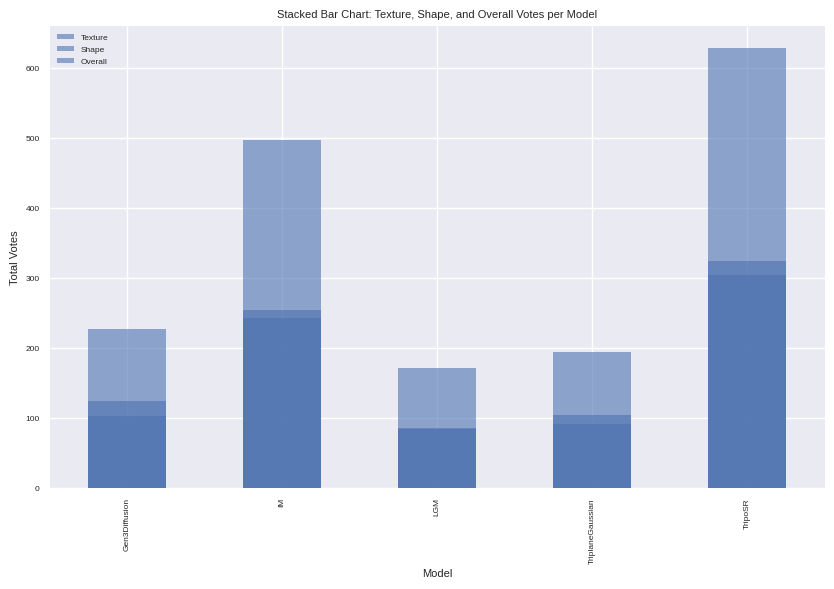

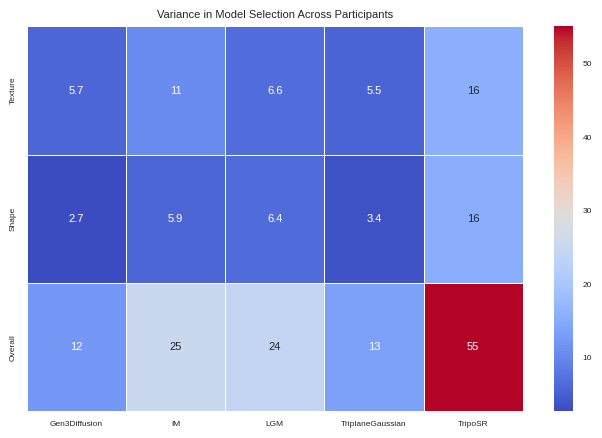

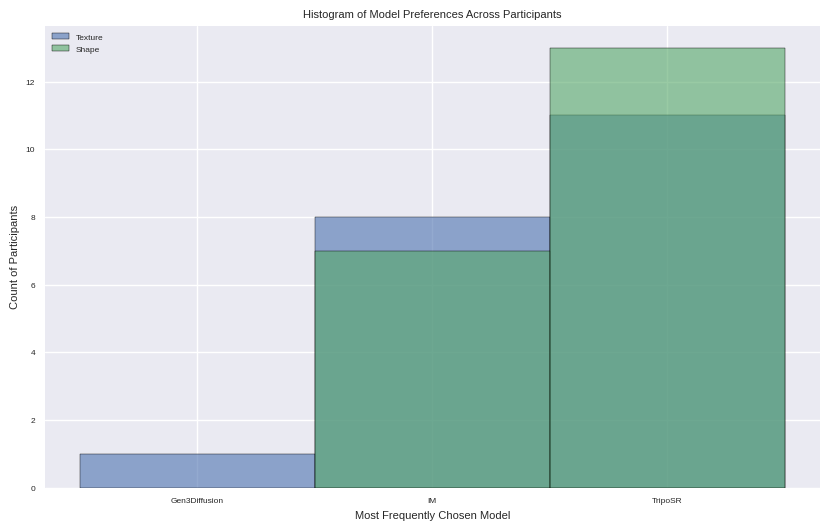

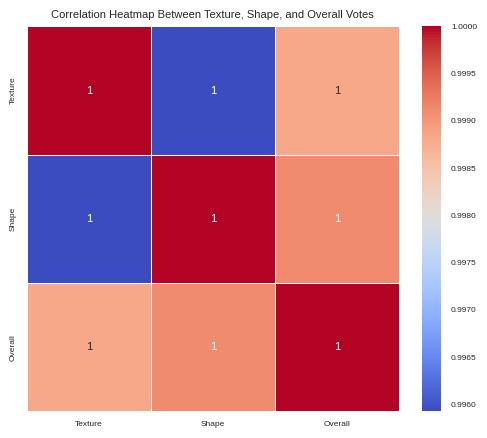

In [77]:
# Assuming `response_df` is already computed from your process

# Extract shape, texture, and overall responses
df_texture = response_df["Texture"]
df_shape = response_df["Shape"]
df_overall = response_df["Overall"]

# Check how often participants picked the same model for texture and shape
same_choice_ratio = (df_texture.idxmax(axis=1) == df_shape.idxmax(axis=1)).mean()
print(f"Percentage of participants selecting the same model for shape and texture: {same_choice_ratio * 100:.2f}%")

# ====== Plot 1: Stacked Bar Chart for Model Selection ======
plt.figure(figsize=(10, 6))
df_texture.sum().plot(kind='bar', alpha=0.6, label="Texture")
df_shape.sum().plot(kind='bar', alpha=0.6, label="Shape")
df_overall.sum().plot(kind='bar', alpha=0.6, label="Overall")
plt.xlabel("Model")
plt.ylabel("Total Votes")
plt.title("Stacked Bar Chart: Texture, Shape, and Overall Votes per Model")
plt.legend()
plt.show()

# ====== Plot 2: Variance in Participant Responses ======
df_variance = pd.DataFrame({
    "Texture": df_texture.var(axis=0),
    "Shape": df_shape.var(axis=0),
    "Overall": df_overall.var(axis=0)
})

plt.figure(figsize=(8, 5))
sns.heatmap(df_variance.T, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Variance in Model Selection Across Participants")
plt.show()

# ====== Plot 3: Histogram of Most Chosen Model per Participant ======
plt.figure(figsize=(10, 6))
sns.histplot(df_texture.idxmax(axis=1), label="Texture", alpha=0.6)
sns.histplot(df_shape.idxmax(axis=1), label="Shape", alpha=0.6)
plt.xlabel("Most Frequently Chosen Model")
plt.ylabel("Count of Participants")
plt.title("Histogram of Model Preferences Across Participants")
plt.legend()
plt.show()

# ====== Plot 4: Correlation Heatmap Between Texture, Shape, and Overall ======
df_corr = pd.concat([df_texture.sum(), df_shape.sum(), df_overall.sum()], axis=1)
df_corr.columns = ["Texture", "Shape", "Overall"]
plt.figure(figsize=(6, 5))
sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap Between Texture, Shape, and Overall Votes")
plt.show()


/tmp/ipykernel_5535/702208659.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(vote_data, labels=objects)


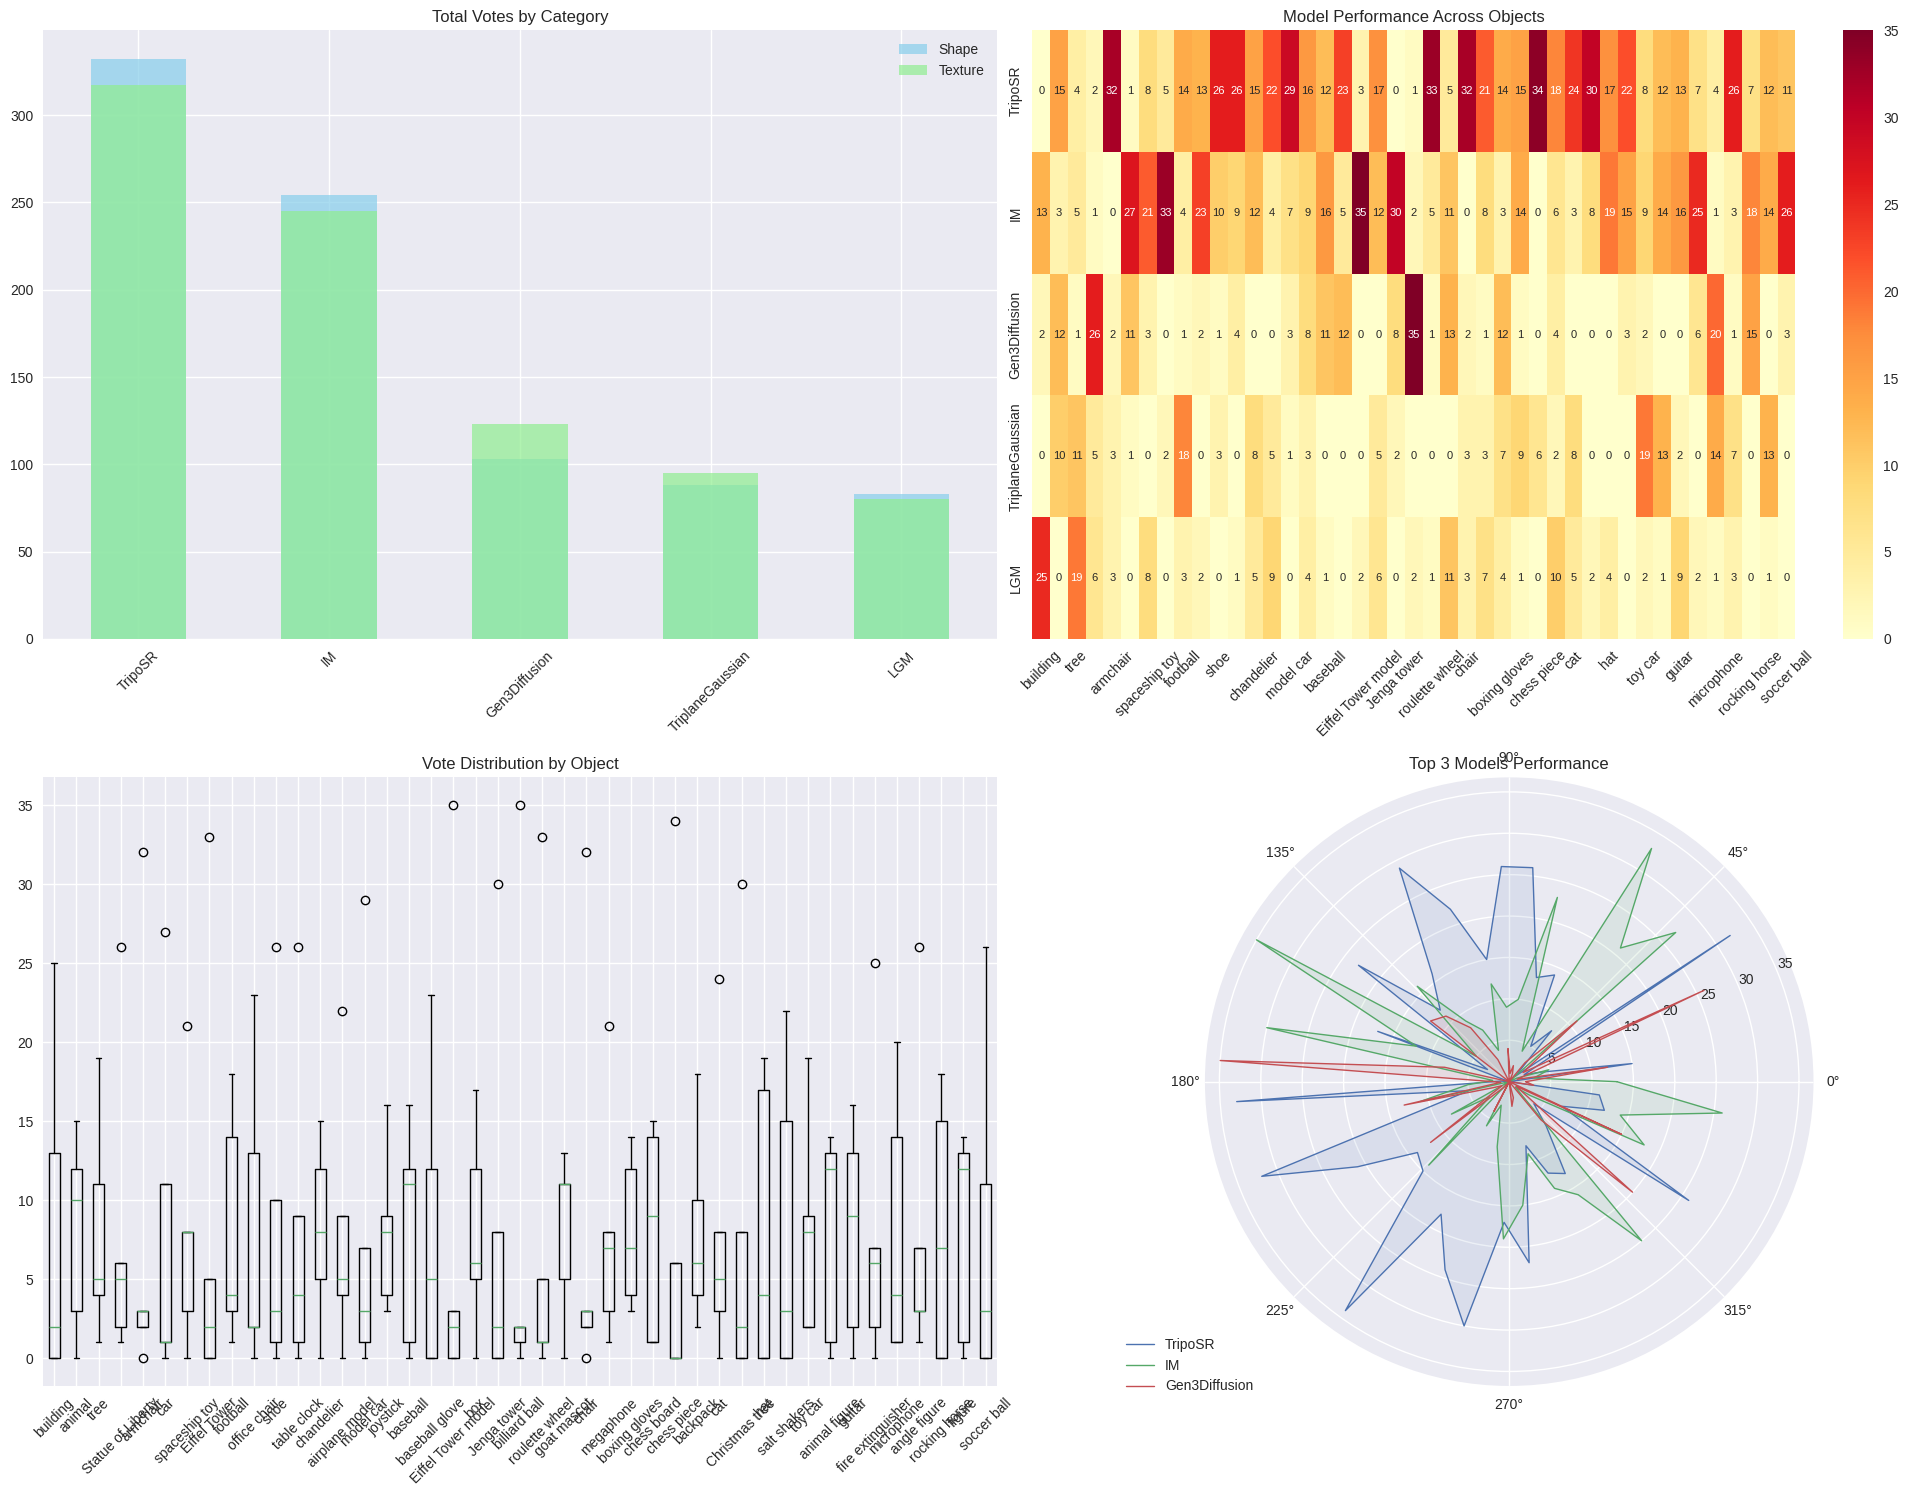


Statistical Summary:

Rankings by Overall Score:
TripoSR             649
IM                  499
Gen3Diffusion       226
TriplaneGaussian    183
LGM                 163
Name: (Overall, Overall), dtype: int64

Variance across objects:
Eiffel Tower model    229.5
billiard ball         228.5
chess piece           218.0
Eiffel Tower          199.5
roulette wheel        199.0
armchair              181.5
chair                 181.5
Christmas tree        162.0
Jenga tower           162.0
model car             145.0
car                   133.0
soccer ball           121.5
building              119.5
shoe                  116.5
table clock           113.5
angle figure          106.0
Statue of Liberty     105.5
salt shakers           99.5
fire extinguisher      98.5
office chair           96.5
baseball glove         94.5
cat                    88.5
hat                    86.5
microphone             73.5
airplane model         71.5
rocking horse          69.5
spaceship toy          64.5
megaphone

In [78]:
# Create figure with subplots
plt.style.use('seaborn-v0_8')
fig = plt.figure(figsize=(20, 15))

# 1. Total Votes Comparison
plt.subplot(2, 2, 1)
model_df[('Overall', 'Shape')].plot(kind='bar', color='skyblue', alpha=0.7)
model_df[('Overall', 'Texture')].plot(kind='bar', color='lightgreen', alpha=0.7)
plt.title('Total Votes by Category', fontsize=12)
plt.legend(['Shape', 'Texture'])
plt.xticks(rotation=45)

# 2. Heatmap of performance across objects
plt.subplot(2, 2, 2)
object_overall = pd.DataFrame()
for obj in objects:
    object_overall[obj] = model_df[(obj, 'Overall')]
sns.heatmap(object_overall, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Model Performance Across Objects', fontsize=12)
plt.xticks(rotation=45)

# 3. Box plot of vote distribution
plt.subplot(2, 2, 3)
vote_data = []
for obj in objects:
    vote_data.append(model_df[(obj, 'Overall')])
plt.boxplot(vote_data, labels=objects)
plt.title('Vote Distribution by Object', fontsize=12)
plt.xticks(rotation=45)

# 4. Radar Chart for top 3 models
plt.subplot(2, 2, 4, projection='polar')
top_3_models = model_df.head(3).index
categories = objects
num_vars = len(categories)
angles = [n / float(num_vars) * 2 * np.pi for n in range(num_vars)]
angles += angles[:1]

for model in top_3_models:
    values = [model_df.loc[model, (obj, 'Overall')] for obj in objects]
    values += values[:1]
    plt.plot(angles, values, linewidth=1, label=model)
    plt.fill(angles, values, alpha=0.1)

plt.title('Top 3 Models Performance', fontsize=12)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.tight_layout()
plt.show()

# Print statistical summary
print("\nStatistical Summary:")
print("\nRankings by Overall Score:")
print(model_df[('Overall', 'Overall')].sort_values(ascending=False))

print("\nVariance across objects:")
print(object_overall.var().sort_values(ascending=False))

# Question 1: Ranking

In [79]:
input_filename = "2025-02-02_results_DECODED.csv"
output_filename = "model_ranking.csv"

# Fixed list of possible models (adjust if necessary)
models = ["IM", "LGM", "Gen3Diffusion", "TriplaneGaussian", "TripoSR"]

# Dictionary to hold counts per pair.
# Structure: { pair_id (str): { "Shape": Counter(), "Texture": Counter() } }
ranking = {}

# Open the input CSV and read header and data.
with open(input_filename, newline="") as f:
    reader = csv.reader(f)
    header = next(reader)
    
    # The first column is Timestamp; the remaining columns form pairs.
    num_pairs = (len(header) - 1) // 2
    # Initialize dictionary for each pair with a two-digit ID.
    for i in range(num_pairs):
        pair_id = f"{i+1:02d}"
        ranking[pair_id] = {"Shape": Counter(), "Texture": Counter()}
    
    # Process each row.
    for row in reader:
        # For each pair, get the Shape answer and Texture answer.
        for i in range(num_pairs):
            pair_id = f"{i+1:02d}"
            shape_index = 1 + 2 * i
            texture_index = shape_index + 1
            # Update the counter if the indices are valid.
            if shape_index < len(row):
                shape_ans = row[shape_index].strip()
                ranking[pair_id]["Shape"][shape_ans] += 1
            if texture_index < len(row):
                texture_ans = row[texture_index].strip()
                ranking[pair_id]["Texture"][texture_ans] += 1

# Prepare the output rows.
# The output will have these headers:
output_header = ["PairID", "Part"] + models + ["TopModel"]
output_rows = []

# For each pair (sorted by pair id), create one row for Shape and one row for Texture.
for pair_id in sorted(ranking.keys()):
    for part in ["Shape", "Texture"]:
        counter = ranking[pair_id][part]
        row_dict = {"PairID": pair_id, "Part": part}
        # Add a column for each model count.
        for model in models:
            row_dict[model] = counter.get(model, 0)
        # Determine the top model (if there are ties, max() returns one arbitrarily).
        if counter:
            top_model = max(counter.items(), key=lambda x: x[1])[0]
        else:
            top_model = ""
        row_dict["TopModel"] = top_model
        output_rows.append(row_dict)

# Create aggregated global counters for Shape and Texture.
global_shape = Counter()
global_texture = Counter()
for pair_data in ranking.values():
    global_shape += pair_data["Shape"]
    global_texture += pair_data["Texture"]

# Add two final rows: one aggregating all Shape counts, one for Texture.
for part, global_counter in zip(["Shape", "Texture"], [global_shape, global_texture]):
    row_dict = {"PairID": "ALL", "Part": part}
    for model in models:
        row_dict[model] = global_counter.get(model, 0)
    if global_counter:
        top_model = max(global_counter.items(), key=lambda x: x[1])[0]
    else:
        top_model = ""
    row_dict["TopModel"] = top_model
    output_rows.append(row_dict)

"""
# Write the output CSV with all fields quoted.
with open(output_filename, "w", newline="") as f:
    writer = csv.DictWriter(f, fieldnames=output_header, quoting=csv.QUOTE_ALL)
    writer.writeheader()
    for row in output_rows:
        writer.writerow(row)

print(f"Ranking output written to '{output_filename}'.")
"""

for i in range(5):
    print(output_rows[i])
print("...")
print(output_rows[-2])
print(output_rows[-1])

{'PairID': '01', 'Part': 'Shape', 'IM': 8, 'LGM': 10, 'Gen3Diffusion': 2, 'TriplaneGaussian': 0, 'TripoSR': 0, 'TopModel': 'LGM'}
{'PairID': '01', 'Part': 'Texture', 'IM': 5, 'LGM': 15, 'Gen3Diffusion': 0, 'TriplaneGaussian': 0, 'TripoSR': 0, 'TopModel': 'LGM'}
{'PairID': '02', 'Part': 'Shape', 'IM': 1, 'LGM': 0, 'Gen3Diffusion': 9, 'TriplaneGaussian': 6, 'TripoSR': 4, 'TopModel': 'Gen3Diffusion'}
{'PairID': '02', 'Part': 'Texture', 'IM': 2, 'LGM': 0, 'Gen3Diffusion': 3, 'TriplaneGaussian': 4, 'TripoSR': 11, 'TopModel': 'TripoSR'}
{'PairID': '03', 'Part': 'Shape', 'IM': 1, 'LGM': 13, 'Gen3Diffusion': 1, 'TriplaneGaussian': 4, 'TripoSR': 1, 'TopModel': 'LGM'}
...
{'PairID': 'ALL', 'Part': 'Shape', 'IM': 255, 'LGM': 86, 'Gen3Diffusion': 103, 'TriplaneGaussian': 91, 'TripoSR': 325, 'TopModel': 'TripoSR'}
{'PairID': 'ALL', 'Part': 'Texture', 'IM': 243, 'LGM': 85, 'Gen3Diffusion': 124, 'TriplaneGaussian': 104, 'TripoSR': 304, 'TopModel': 'TripoSR'}


## 1.1 Shape and Texture

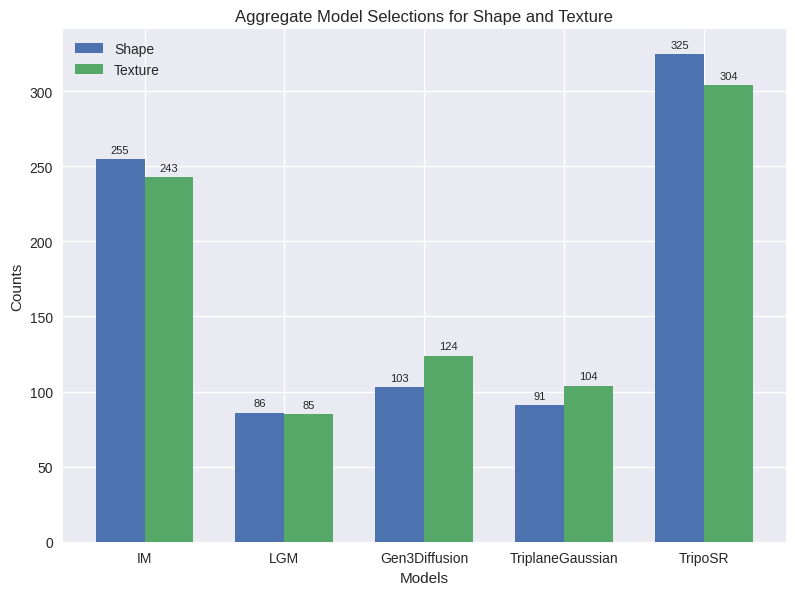

In [80]:
# Assume these variables are defined from your notebook code:
# - models: list of model names, e.g. ["IM", "LGM", "Gen3Diffusion", "TriplaneGaussian", "TripoSR"]
# - output_rows: list of dictionaries, where output_rows[-2] is the global Shape row and output_rows[-1] is the global Texture row

# Extract the aggregate rows
aggregate_shape = output_rows[-2]   # For Shape: {"PairID": "ALL", "Part": "Shape", "IM": count, ... }
aggregate_texture = output_rows[-1] # For Texture: {"PairID": "ALL", "Part": "Texture", "IM": count, ... }

# Get counts for each model in the order of models
shape_counts = [aggregate_shape[model] for model in models]
texture_counts = [aggregate_texture[model] for model in models]

# Set up the positions and width for the bars
x = np.arange(len(models))
width = 0.35  # width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Create grouped bars
rects_shape = ax.bar(x - width/2, shape_counts, width, label='Shape')
rects_texture = ax.bar(x + width/2, texture_counts, width, label='Texture')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Models')
ax.set_ylabel('Counts')
ax.set_title('Aggregate Model Selections for Shape and Texture')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Function to add labels above bars for clarity
def autolabel(rects):
    """Attach a text label above each bar displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height}',
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),  # Offset label above the bar
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects_shape)
autolabel(rects_texture)

fig.tight_layout()
plt.show()


In [81]:
# ! UTIL

# Assume that 'ranking' and 'models' are already defined as before.
# Get sorted PairIDs.
pair_ids = sorted(ranking.keys())

# Build a DataFrame for Shape counts.
data_shape = []
for pid in pair_ids:
    data_shape.append([ranking[pid]["Shape"].get(model, 0) for model in models])
df_shape = pd.DataFrame(data_shape, index=pair_ids, columns=models)

# Build a DataFrame for Texture counts.
data_texture = []
for pid in pair_ids:
    data_texture.append([ranking[pid]["Texture"].get(model, 0) for model in models])
df_texture = pd.DataFrame(data_texture, index=pair_ids, columns=models)

# Transpose the DataFrames so that models are rows and pair_ids are columns.
df_shape_transposed = df_shape.T
df_texture_transposed = df_texture.T


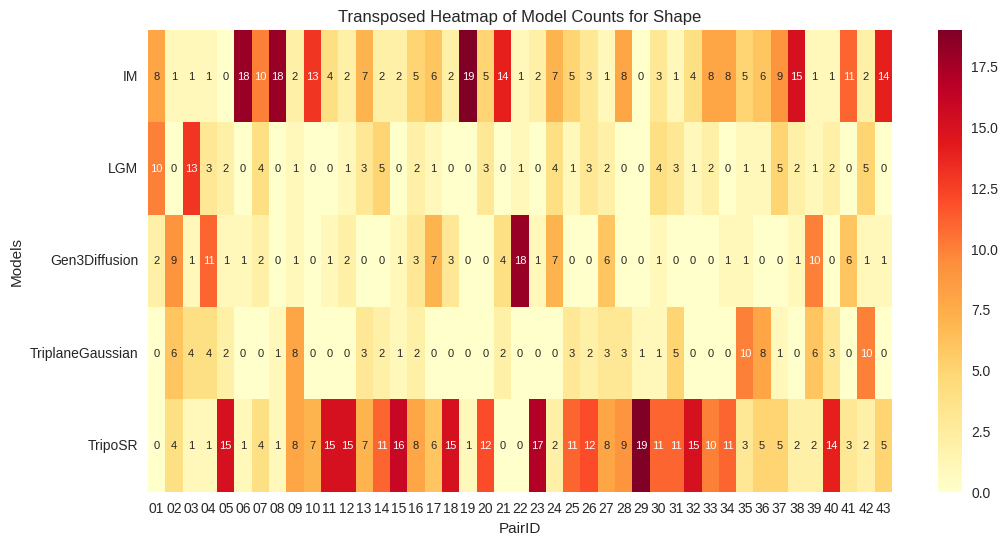

In [82]:
# Plot the transposed heatmap for Shape using a warm-only colour scheme.
plt.figure(figsize=(12, 6))
sns.heatmap(df_shape_transposed, annot=True, fmt="d", cmap="YlOrRd")
plt.title("Transposed Heatmap of Model Counts for Shape")
plt.xlabel("PairID")
plt.ylabel("Models")
plt.show()

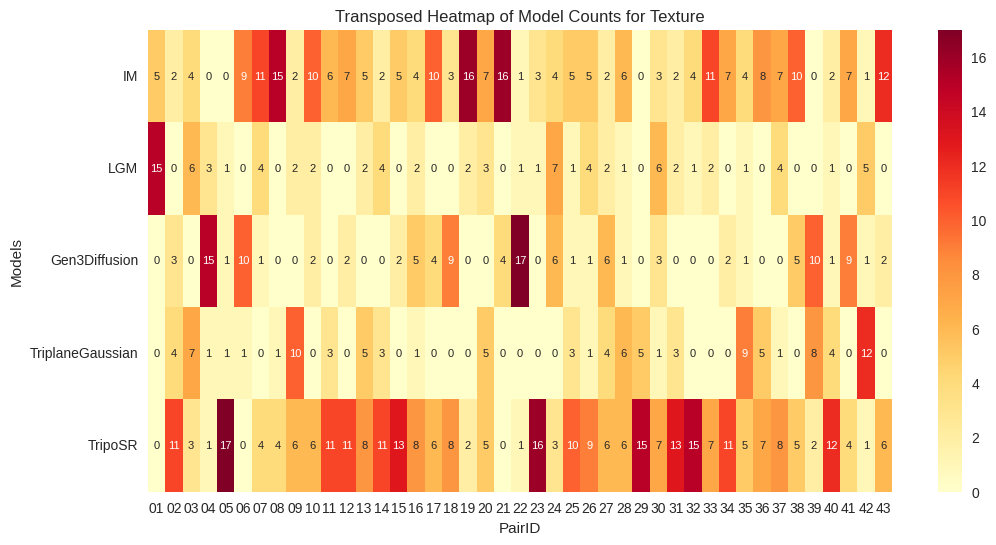

In [83]:
# Plot the transposed heatmap for Texture using a warm-only colour scheme.
plt.figure(figsize=(12, 6))
sns.heatmap(df_texture_transposed, annot=True, fmt="d", cmap="YlOrRd")
plt.title("Transposed Heatmap of Model Counts for Texture")
plt.xlabel("PairID")
plt.ylabel("Models")
plt.show()

## 1.2 Correlation

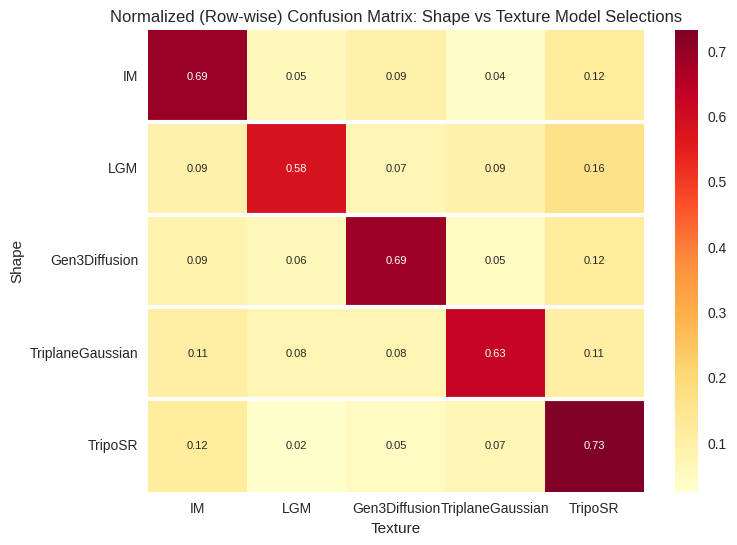

In [84]:
# Fixed list of possible models.
models = ["IM", "LGM", "Gen3Diffusion", "TriplaneGaussian", "TripoSR"]

input_filename = "2025-02-02_results_DECODED.csv"

# Accumulate counts for each (shape, texture) pair.
confusion_counts = Counter()

with open(input_filename, newline="") as f:
    reader = csv.reader(f)
    header = next(reader)
    # First column is Timestamp; the remaining columns form pairs.
    num_pairs = (len(header) - 1) // 2

    for row in reader:
        for i in range(num_pairs):
            shape_index = 1 + 2 * i
            texture_index = shape_index + 1
            if shape_index < len(row) and texture_index < len(row):
                shape_ans = row[shape_index].strip()
                texture_ans = row[texture_index].strip()
                confusion_counts[(shape_ans, texture_ans)] += 1

# Create a matrix with rows = shape selections and columns = texture selections.
matrix = np.zeros((len(models), len(models)), dtype=int)
for i, shape in enumerate(models):
    for j, texture in enumerate(models):
        matrix[i, j] = confusion_counts[(shape, texture)]

df_confusion = pd.DataFrame(matrix, index=models, columns=models)

# Normalize row-wise: each row is divided by its sum so that it sums to 1.
df_norm = df_confusion.div(df_confusion.sum(axis=1), axis=0)

plt.figure(figsize=(8, 6))
# Disable built-in grid by setting linewidths=0.
ax = sns.heatmap(df_norm, annot=True, fmt=".2f", cmap="YlOrRd", linewidths=0)
plt.title("Normalized (Row-wise) Confusion Matrix: Shape vs Texture Model Selections")
plt.xlabel("Texture")
plt.ylabel("Shape")

# Manually add white horizontal lines between rows.
# These lines provide extra white spacing only between rows.
for i in range(1, df_norm.shape[0]):
    ax.axhline(i, color='white', linewidth=3)

plt.show()


# Question 2: Variance in Votes

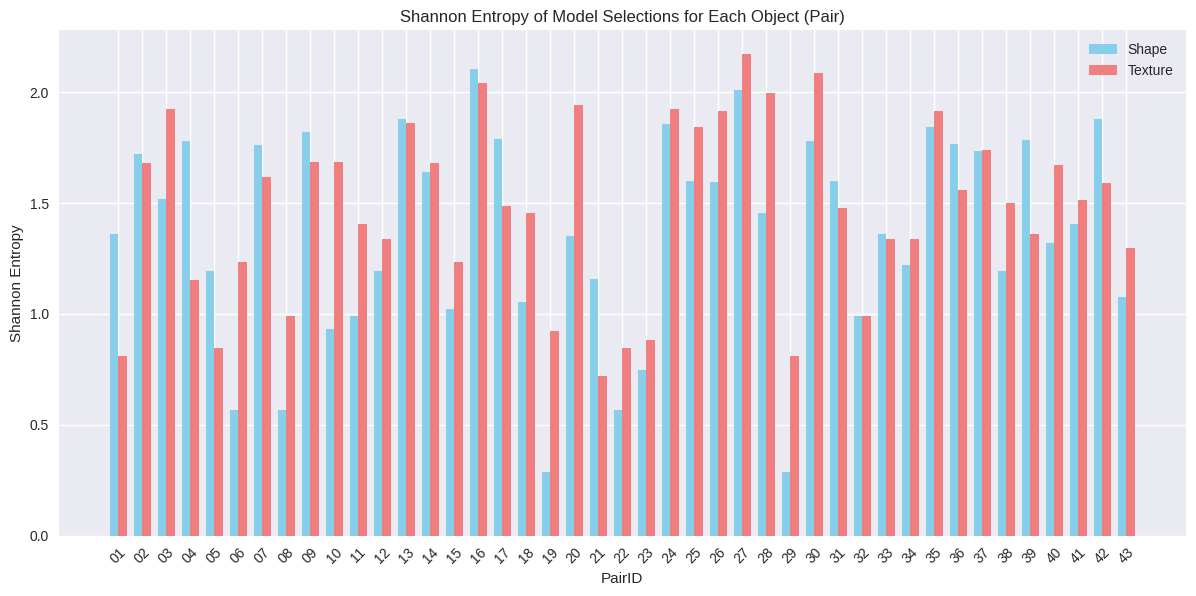

In [85]:
def shannon_entropy(counter):
    """Compute the Shannon entropy for a Counter/dictionary of counts.
    Entropy is defined as: -Σ(p_i * log₂ p_i) over all items.
    """
    total = sum(counter.values())
    if total == 0:
        return 0
    entropy = 0
    for count in counter.values():
        if count > 0:
            p = count / total
            entropy -= p * np.log2(p)
    return entropy

# Compute entropy for each PairID and for each part.
entropy_shape = {}
entropy_texture = {}
for pair_id, parts in ranking.items():
    entropy_shape[pair_id] = shannon_entropy(parts["Shape"])
    entropy_texture[pair_id] = shannon_entropy(parts["Texture"])

# Sort the PairIDs to have a consistent x-axis.
pair_ids_sorted = sorted(ranking.keys())

# Create arrays of entropy values.
entropy_shape_values = np.array([entropy_shape[p] for p in pair_ids_sorted])
entropy_texture_values = np.array([entropy_texture[p] for p in pair_ids_sorted])

# Create a grouped bar chart.
x = np.arange(len(pair_ids_sorted))
width = 0.35  # width of each bar

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, entropy_shape_values, width, label='Shape', color='skyblue')
plt.bar(x + width/2, entropy_texture_values, width, label='Texture', color='lightcoral')

plt.xlabel('PairID')
plt.ylabel('Shannon Entropy')
plt.title('Shannon Entropy of Model Selections for Each Object (Pair)')
plt.xticks(x, pair_ids_sorted, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [86]:
# ! UTIL

def shannon_entropy(counter):
    """Compute the Shannon entropy for a Counter/dictionary of counts.
    Entropy is defined as: -Σ(p_i * log₂ p_i) over all items.
    """
    total = sum(counter.values())
    if total == 0:
        return 0
    entropy = 0
    for count in counter.values():
        if count > 0:
            p = count / total
            entropy -= p * np.log2(p)
    return entropy

# Compute entropy for each PairID and for each part.
entropy_shape = {}
entropy_texture = {}
for pair_id, parts in ranking.items():
    entropy_shape[pair_id] = shannon_entropy(parts["Shape"])
    entropy_texture[pair_id] = shannon_entropy(parts["Texture"])

# Sort the pair IDs in ascending order based on entropy.
pair_ids_shape_sorted = sorted(entropy_shape, key=lambda pid: entropy_shape[pid])
entropy_shape_values_sorted = [entropy_shape[pid] for pid in pair_ids_shape_sorted]

pair_ids_texture_sorted = sorted(entropy_texture, key=lambda pid: entropy_texture[pid])
entropy_texture_values_sorted = [entropy_texture[pid] for pid in pair_ids_texture_sorted]

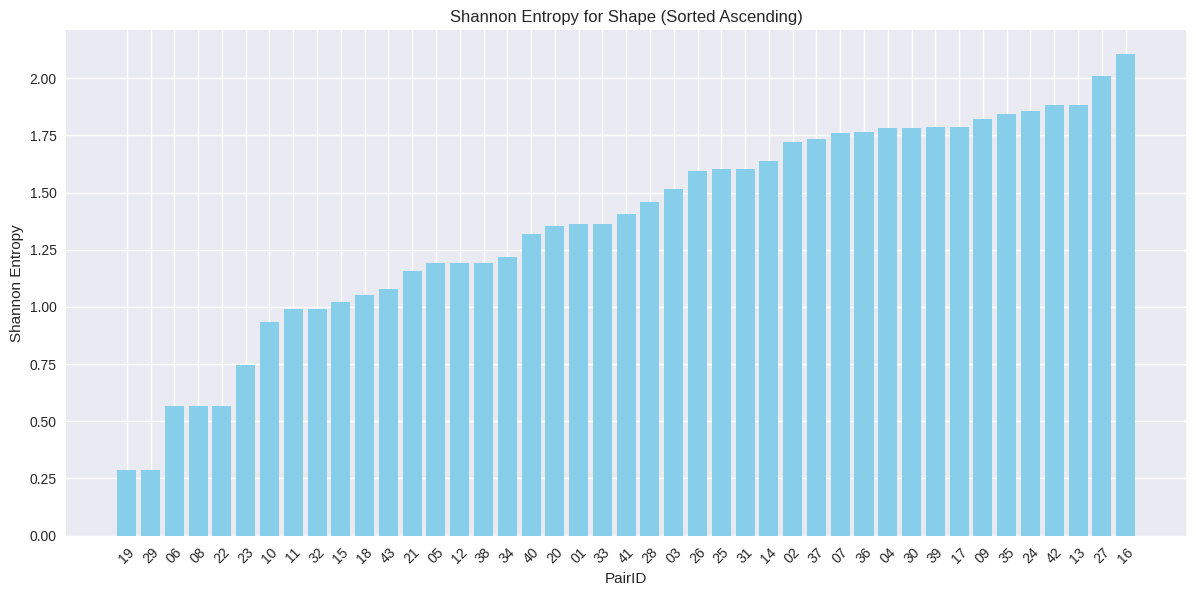

In [87]:
# Plot for Shape
plt.figure(figsize=(12, 6))
x_shape = np.arange(len(pair_ids_shape_sorted))
plt.bar(x_shape, entropy_shape_values_sorted, color='skyblue')
plt.xlabel('PairID')
plt.ylabel('Shannon Entropy')
plt.title('Shannon Entropy for Shape (Sorted Ascending)')
plt.xticks(x_shape, pair_ids_shape_sorted, rotation=45)
plt.tight_layout()
plt.show()

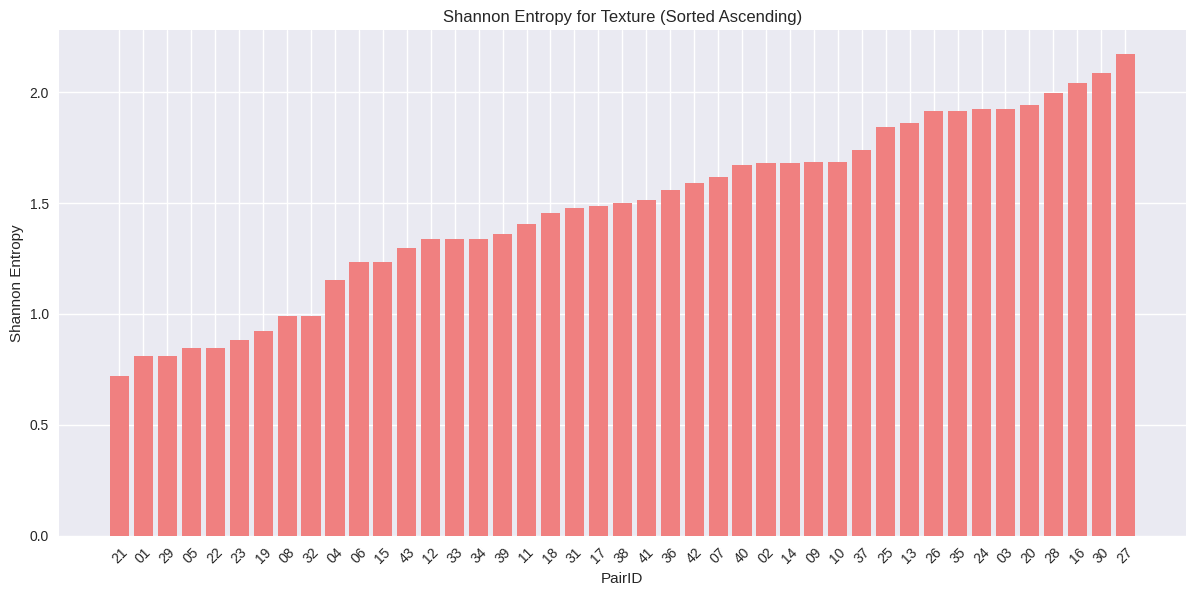

In [88]:
# Plot for Texture
plt.figure(figsize=(12, 6))
x_texture = np.arange(len(pair_ids_texture_sorted))
plt.bar(x_texture, entropy_texture_values_sorted, color='lightcoral')
plt.xlabel('PairID')
plt.ylabel('Shannon Entropy')
plt.title('Shannon Entropy for Texture (Sorted Ascending)')
plt.xticks(x_texture, pair_ids_texture_sorted, rotation=45)
plt.tight_layout()
plt.show()

# Question 3: Individual Preference

In [89]:
# Compute per-user ranking with paired rows (one for Shape, one for Texture)
user_ranking_rows = []

# Iterate over each user (the index of response_df holds user ids)
for user_id, row in response_df.iterrows():
    for part in ['Shape', 'Texture']:
        # Get the count series for this part; index are model names
        counts = row[part]
        row_dict = {'UserID': user_id, 'Part': part}
        # For each model (using all_models as our complete index), add its count
        for model in all_models:
            row_dict[model] = counts.get(model, 0)
        # Determine the top model (if there is a tie, idxmax returns one arbitrarily)
        if counts.sum() > 0:
            top_model = counts.idxmax()
        else:
            top_model = ""
        row_dict["TopModel"] = top_model
        user_ranking_rows.append(row_dict)

# Create a DataFrame from the computed rows
user_ranking_df = pd.DataFrame(user_ranking_rows)

# Optionally, sort the DataFrame by UserID and then by Part (if needed)
user_ranking_df = user_ranking_df.sort_values(['UserID', 'Part'])

# Display the first few rows of the per-user ranking DataFrame
print(user_ranking_df.head(10))


    UserID     Part  Gen3Diffusion  IM  LGM  TriplaneGaussian  TripoSR  \
6        0    Shape              6  12    1                 5       19   
7        0  Texture              7  10    1                 7       18   
16       1    Shape              6  13    6                 2       16   
17       1  Texture              7  11    7                 2       16   
30       2    Shape              4  17    4                 3       15   
31       2  Texture              5  11    4                 4       19   
10       3    Shape              6  15    3                 2       17   
11       3  Texture              7  15    2                 6       13   
20       4    Shape              4  15    2                 8       14   
21       4  Texture              7  14    3                 5       14   

   TopModel  
6   TripoSR  
7   TripoSR  
16  TripoSR  
17  TripoSR  
30       IM  
31  TripoSR  
10  TripoSR  
11       IM  
20       IM  
21       IM  


In [90]:
user_ranking_df

,UserID,Part,Gen3Diffusion,IM,LGM,TriplaneGaussian,TripoSR,TopModel
6,0,Shape,6,12,1,5,19,TripoSR
7,0,Texture,7,10,1,7,18,TripoSR
16,1,Shape,6,13,6,2,16,TripoSR
17,1,Texture,7,11,7,2,16,TripoSR
30,2,Shape,4,17,4,3,15,IM
31,2,Texture,5,11,4,4,19,TripoSR
10,3,Shape,6,15,3,2,17,TripoSR
11,3,Texture,7,15,2,6,13,IM
20,4,Shape,4,15,2,8,14,IM
21,4,Texture,7,14,3,5,14,IM


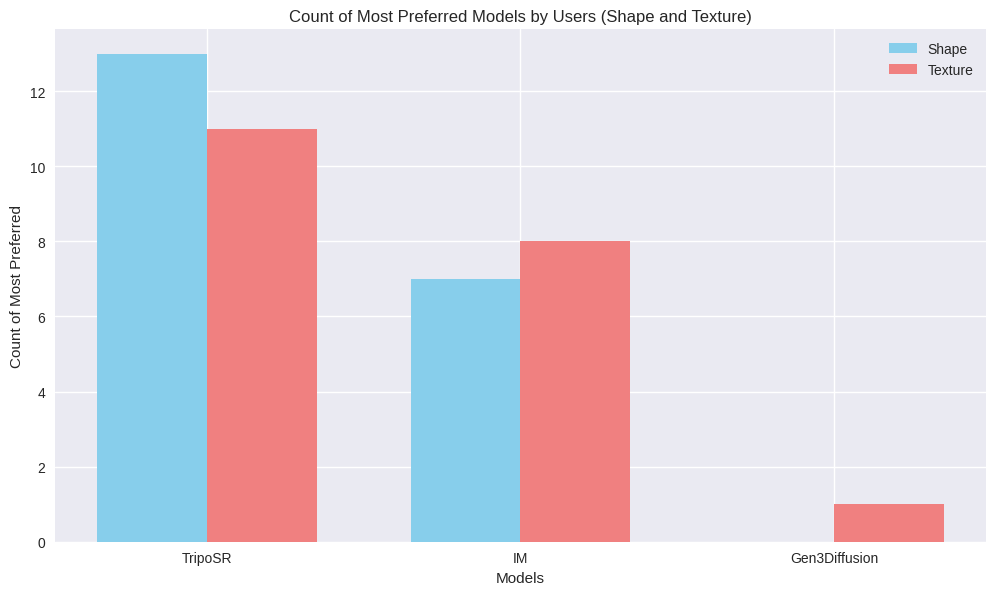

In [91]:
# Filter for each part
shape_df = user_ranking_df[user_ranking_df['Part'] == 'Shape']
texture_df = user_ranking_df[user_ranking_df['Part'] == 'Texture']

# Count the top model occurrences per part
shape_counts = shape_df['TopModel'].value_counts()
texture_counts = texture_df['TopModel'].value_counts()

# Compute the union of models from both parts
union_index = shape_counts.index.union(texture_counts.index)

# Reindex both series to include all models (filling missing counts with 0)
shape_counts = shape_counts.reindex(union_index, fill_value=0)
texture_counts = texture_counts.reindex(union_index, fill_value=0)

# Now sort the union based on the shape counts in descending order.
models_ordered = shape_counts.sort_values(ascending=False).index.tolist()

# Set up x-axis positions and bar width for a grouped bar chart.
x = np.arange(len(models_ordered))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, shape_counts.loc[models_ordered].values, width, label='Shape', color='skyblue')
plt.bar(x + width/2, texture_counts.loc[models_ordered].values, width, label='Texture', color='lightcoral')

plt.xlabel("Models")
plt.ylabel("Count of Most Preferred")
plt.title("Count of Most Preferred Models by Users (Shape and Texture)")
plt.xticks(x, models_ordered)
plt.legend()
plt.tight_layout()
plt.show()

